21522351 - Nguyễn Ngọc Hà My

6. (Lập trình) Cho mẫu dữ liệu Groceries Dataset2 về các giao dịch trong một tháng của
một cửa hàng outlet, gồm 9835 giao dịch và 169 items. <br>
Với min_sup từ 0.01 đến 0.1, hãy:

a) Tìm tất cả các tập phổ biến trong từng trường hợp bằng giải thuật Apriori và ghi
nhận thời gian xử lý của thuật toán. Gợi ý: sinh viên có thể sử dụng module
OneHotTransactions hoặc TransactionEncoder của thư viện mlxtend để chuyển dữ
liệu về dạng one-hot encoding trước khi đưa vào thuật toán.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [2]:
#Ghép các cột trong file groceries thành một cột cách nhau bởi dấu "," và không có tên cột
df = pd.read_csv("groceries.csv",header=None, sep='\t')

In [3]:
df.head

<bound method NDFrame.head of                                                       0
0     citrus fruit,semi-finished bread,margarine,rea...
1                          tropical fruit,yogurt,coffee
2                                            whole milk
3            pip fruit,yogurt,cream cheese,meat spreads
4     other vegetables,whole milk,condensed milk,lon...
...                                                 ...
9830  sausage,chicken,beef,hamburger meat,citrus fru...
9831                                  cooking chocolate
9832  chicken,citrus fruit,other vegetables,butter,y...
9833  semi-finished bread,bottled water,soda,bottled...
9834  chicken,tropical fruit,other vegetables,vinega...

[9835 rows x 1 columns]>

In [4]:
#Tách các dữ liệu trong một cột thành nhiều cột dựa vào dấu ",". Và tên cột sẽ bắt đầu bằng số 0
df = df[0].str.split(',', expand=True)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,None,None,None,None,None,None,None,None,None,None
9831,cooking chocolate,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,None,None,None,None,None,None,None,None,None,None
9833,semi-finished bread,bottled water,soda,bottled beer,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Sử dụng module TransactionEncoder của thư viện mlxtend để chuyển dữ liệu về dạng one-hot encoding trước khi đưa vào thuật toán.


Chuyển đổi dữ liệu df thành mảng

In [6]:
data = []
for i in range(0, 9835):
    data.append([str(df.values[i,j]) for j in range(0, 32)])
trans = np.array(data)

In [7]:
#Loại bỏ các giá trị None
data =[[x for x in row if str(x)!='None']for row in data]
data

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [8]:
#Chuyển dữ liệu về dạng One hot encoding bằng TransactionctionEncoder và đổi kiểu dữ liệu Boolean về Integer
te = TransactionEncoder()
te_array = te.fit(data).transform(data).astype("bool")
te_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
#Kiểm tra thông tin các cột của te
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [10]:
#Chuyển te_array từ mảng thành DataFrame
import pandas as pd
dt=pd.DataFrame(te_array, columns=te.columns_)

In [11]:
dt

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


a) Tìm tất cả các tập phổ biến trong từng trường hợp bằng giải thuật Apriori và ghi nhận thời gian xử lý của thuật toán.
Import thư viện để tính thời gian

In [12]:
from datetime import datetime, timedelta
import time

In [13]:
#Tạo hai mảng để lưu giá trị thời gian chạy của thuật toán Apriori và FP-Growth
Time_Ap = []
Time_FP = []

In [14]:
#Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.01.
start_Ap_l2 = time.time()
itemsets = apriori(dt, min_support=0.01, use_colnames = True)
end_Ap_l2 = time.time()
print(timedelta(seconds=round(end_Ap_l2-start_Ap_l2,5)))
Time_Ap.append(end_Ap_l2-start_Ap_l2)
itemsets

0:00:00.245100


,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(whole milk, tropical fruit, root vegetables)"
329,0.014540,"(whole milk, yogurt, root vegetables)"
330,0.010473,"(whole milk, yogurt, soda)"
331,0.015150,"(whole milk, yogurt, tropical fruit)"


In [15]:
#Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.02.
start_Ap_l2 = time.time()
itemsets = apriori(dt, min_support=0.02, use_colnames = True)
end_Ap_l2 = time.time()
print(timedelta(seconds=round(end_Ap_l2-start_Ap_l2,5)))
Time_Ap.append(end_Ap_l2-start_Ap_l2)
itemsets

0:00:00.109320


,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
117,0.032232,"(whole milk, whipped/sour cream)"
118,0.020742,"(whipped/sour cream, yogurt)"
119,0.056024,"(whole milk, yogurt)"
120,0.023183,"(whole milk, other vegetables, root vegetables)"


In [16]:
#Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.03.
start_Ap_l3 = time.time()
itemsets = apriori(dt, min_support=0.03, use_colnames = True)
end_Ap_l3 = time.time()
print(timedelta(seconds=round(end_Ap_l3-start_Ap_l3,3)))
Time_Ap.append(end_Ap_l3-start_Ap_l3)
itemsets

0:00:00.064000


,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.080529,(bottled beer)
4,0.110524,(bottled water)
...,...,...
58,0.048907,"(whole milk, root vegetables)"
59,0.040061,"(whole milk, soda)"
60,0.042298,"(whole milk, tropical fruit)"
61,0.032232,"(whole milk, whipped/sour cream)"


In [17]:
#Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.04.
start_Ap_l4 = time.time()
itemsets = apriori(dt, min_support=0.04, use_colnames = True)
end_Ap_l4 = time.time()
print(timedelta(seconds=round(end_Ap_l4-start_Ap_l4,4)))
Time_Ap.append(end_Ap_l4-start_Ap_l4)
itemsets

0:00:00.029400


,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.042908,(chicken)
7,0.049619,(chocolate)
8,0.082766,(citrus fruit)
9,0.058058,(coffee)


In [18]:
#Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.05.
start_Ap_l5 = time.time()
itemsets = apriori(dt, min_support=0.05, use_colnames = True)
end_Ap_l5 = time.time()
print(timedelta(seconds=round(end_Ap_l5-start_Ap_l5,5)))
Time_Ap.append(end_Ap_l5-start_Ap_l5)
itemsets

0:00:00.027290


,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [19]:
#Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.06.
start_Ap_l6 = time.time()
itemsets = apriori(dt, min_support=0.06, use_colnames = True)
end_Ap_l6 = time.time()
print(timedelta(seconds=round(end_Ap_l6-start_Ap_l6,5)))
Time_Ap.append(end_Ap_l6-start_Ap_l6)
itemsets

0:00:00.021780


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.064870,(brown bread)
3,0.077682,(canned beer)
4,0.082766,(citrus fruit)
5,0.063447,(domestic eggs)
6,0.072293,(fruit/vegetable juice)
7,0.079817,(newspapers)
8,0.193493,(other vegetables)
9,0.088968,(pastry)


In [20]:
#Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.07.
start_Ap_l7 = time.time()
itemsets = apriori(dt, min_support=0.07, use_colnames = True)
end_Ap_l7 = time.time()
print(timedelta(seconds=round(end_Ap_l7-start_Ap_l7,5)))
Time_Ap.append(end_Ap_l7-start_Ap_l7)
itemsets

0:00:00.014500


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.077682,(canned beer)
3,0.082766,(citrus fruit)
4,0.072293,(fruit/vegetable juice)
5,0.079817,(newspapers)
6,0.193493,(other vegetables)
7,0.088968,(pastry)
8,0.075648,(pip fruit)
9,0.183935,(rolls/buns)


In [21]:
#Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.08.
start_Ap_l8 = time.time()
itemsets = apriori(dt, min_support=0.08, use_colnames = True)
end_Ap_l8 = time.time()
print(timedelta(seconds=round(end_Ap_l8-start_Ap_l8,5)))
Time_Ap.append(end_Ap_l8-start_Ap_l8)
itemsets

0:00:00.009570


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.082766,(citrus fruit)
3,0.193493,(other vegetables)
4,0.088968,(pastry)
5,0.183935,(rolls/buns)
6,0.108998,(root vegetables)
7,0.093950,(sausage)
8,0.098526,(shopping bags)
9,0.174377,(soda)


In [22]:
#Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.09.
start_Ap_l9 = time.time()
itemsets = apriori(dt, min_support=0.09, use_colnames = True)
end_Ap_l9 = time.time()
print(timedelta(seconds=round(end_Ap_l9-start_Ap_l9,5)))
Time_Ap.append(end_Ap_l9-start_Ap_l9)
itemsets

0:00:00.008470


,support,itemsets
0,0.110524,(bottled water)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.108998,(root vegetables)
4,0.093950,(sausage)
5,0.098526,(shopping bags)
6,0.174377,(soda)
7,0.104931,(tropical fruit)
8,0.255516,(whole milk)
9,0.139502,(yogurt)


In [23]:
#Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 0.1.
start_Ap_l10 = time.time()
itemsets = apriori(dt, min_support=0.1, use_colnames = True)
end_Ap_l10 = time.time()
print(timedelta(seconds=round(end_Ap_l10-start_Ap_l10,5)))
Time_Ap.append(end_Ap_l10-start_Ap_l10)
itemsets

0:00:00.007570


,support,itemsets
0,0.110524,(bottled water)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.108998,(root vegetables)
4,0.174377,(soda)
5,0.104931,(tropical fruit)
6,0.255516,(whole milk)
7,0.139502,(yogurt)


b) Tìm tất cả các tập phổ biến trong từng trường hợp bằng giải thuật FP-Growth và ghi nhận thời gian xử lý của thuật toán.

In [24]:
#Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.01.
start_FP_l1 = time.time()
itemsets = fpgrowth(dt, min_support=0.01, use_colnames = True)
end_FP_l1 = time.time()
print(timedelta(seconds=round(end_FP_l1-start_FP_l1,5)))
Time_FP.append(end_FP_l1-start_FP_l1)
itemsets

0:00:00.167230


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
...,...,...
328,0.010168,"(frozen vegetables, rolls/buns)"
329,0.012405,"(frozen vegetables, yogurt)"
330,0.014235,"(onions, other vegetables)"
331,0.012100,"(whole milk, onions)"


In [25]:
#Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.02.
start_FP_l2 = time.time()
itemsets = fpgrowth(dt, min_support=0.02, use_colnames = True)
end_FP_l2 = time.time()
print(timedelta(seconds=round(end_FP_l2-start_FP_l2,5)))
Time_FP.append(end_FP_l2-start_FP_l2)
itemsets

0:00:00.149980


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
...,...,...
117,0.022166,"(whole milk, pork)"
118,0.021657,"(pork, other vegetables)"
119,0.029995,"(whole milk, domestic eggs)"
120,0.022267,"(domestic eggs, other vegetables)"


In [26]:
#Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.03.
start_FP_l3 = time.time()
itemsets = fpgrowth(dt, min_support=0.03, use_colnames = True)
end_FP_l3 = time.time()
print(timedelta(seconds=round(end_FP_l3-start_FP_l3,5)))
Time_FP.append(end_FP_l3-start_FP_l3)
itemsets

0:00:00.096210


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
...,...,...
58,0.033249,"(whole milk, pastry)"
59,0.047382,"(other vegetables, root vegetables)"
60,0.048907,"(whole milk, root vegetables)"
61,0.030605,"(rolls/buns, sausage)"


In [27]:
#Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.04.
start_FP_l4 = time.time()
itemsets = fpgrowth(dt, min_support=0.04, use_colnames = True)
end_FP_l4 = time.time()
print(timedelta(seconds=round(end_FP_l4-start_FP_l4,5)))
Time_FP.append(end_FP_l4-start_FP_l4)
itemsets

0:00:00.082610


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.193493,(other vegetables)
8,0.055414,(butter)
9,0.183935,(rolls/buns)


In [28]:
#Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.05.
start_FP_l5 = time.time()
itemsets = fpgrowth(dt, min_support=0.05, use_colnames = True)
end_FP_l5 = time.time()
print(timedelta(seconds=round(end_FP_l5-start_FP_l5,5)))
Time_FP.append(end_FP_l5-start_FP_l5)
itemsets

0:00:00.071610


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.193493,(other vegetables)
8,0.055414,(butter)
9,0.183935,(rolls/buns)


In [29]:
#Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.06.
start_FP_l6 = time.time()
itemsets = fpgrowth(dt, min_support=0.06, use_colnames = True)
end_FP_l6 = time.time()
print(timedelta(seconds=round(end_FP_l6-start_FP_l6,5)))
Time_FP.append(end_FP_l6-start_FP_l6)
itemsets

0:00:00.061790


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.075648,(pip fruit)
5,0.193493,(other vegetables)
6,0.183935,(rolls/buns)
7,0.080529,(bottled beer)
8,0.110524,(bottled water)
9,0.174377,(soda)


In [30]:
#Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.07.
start_FP_l8 = time.time()
itemsets = fpgrowth(dt, min_support=0.07, use_colnames = True)
end_FP_l8 = time.time()
print(timedelta(seconds=round(end_FP_l8-start_FP_l8,5)))
Time_FP.append(end_FP_l8-start_FP_l8)
itemsets

0:00:00.046940


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.075648,(pip fruit)
5,0.193493,(other vegetables)
6,0.183935,(rolls/buns)
7,0.080529,(bottled beer)
8,0.110524,(bottled water)
9,0.174377,(soda)


In [31]:
#Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.08.
start_FP_l8 = time.time()
itemsets = fpgrowth(dt, min_support=0.08, use_colnames = True)
end_FP_l8 = time.time()
print(timedelta(seconds=round(end_FP_l8-start_FP_l8,5)))
Time_FP.append(end_FP_l8-start_FP_l8)
itemsets

0:00:00.043300


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.193493,(other vegetables)
5,0.183935,(rolls/buns)
6,0.080529,(bottled beer)
7,0.110524,(bottled water)
8,0.174377,(soda)
9,0.088968,(pastry)


In [32]:
#Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.09.
start_FP_l9 = time.time()
itemsets = fpgrowth(dt, min_support=0.09, use_colnames = True)
end_FP_l9 = time.time()
print(timedelta(seconds=round(end_FP_l9-start_FP_l9,5)))
Time_FP.append(end_FP_l9-start_FP_l9)
itemsets

0:00:00.043170


,support,itemsets
0,0.139502,(yogurt)
1,0.104931,(tropical fruit)
2,0.255516,(whole milk)
3,0.193493,(other vegetables)
4,0.183935,(rolls/buns)
5,0.110524,(bottled water)
6,0.174377,(soda)
7,0.108998,(root vegetables)
8,0.093950,(sausage)
9,0.098526,(shopping bags)


In [33]:
#Tìm tập phổ biến bằng thuật toán FP-Growth với min_sup = 0.1.
start_FP_l10 = time.time()
itemsets = fpgrowth(dt, min_support=0.1, use_colnames = True)
end_FP_l10 = time.time()
print(timedelta(seconds=round(end_FP_l10-start_FP_l10,5)))
Time_FP.append(end_FP_l10-start_FP_l10)
itemsets

0:00:00.052620


,support,itemsets
0,0.139502,(yogurt)
1,0.104931,(tropical fruit)
2,0.255516,(whole milk)
3,0.193493,(other vegetables)
4,0.183935,(rolls/buns)
5,0.110524,(bottled water)
6,0.174377,(soda)
7,0.108998,(root vegetables)


Thời gian của từng thuật toán đưa vào mảng

In [34]:
print("Thời gian chạy Apriori")
Time_Ap

Thời gian chạy Apriori


[0.2451021671295166,
 0.10932183265686035,
 0.06429028511047363,
 0.029379844665527344,
 0.027292490005493164,
 0.02178192138671875,
 0.014495372772216797,
 0.009570598602294922,
 0.008466720581054688,
 0.007573843002319336]

In [35]:
print("Thời gian chạy FP-Growth")
Time_FP

Thời gian chạy FP-Growth


[0.1672346591949463,
 0.14997577667236328,
 0.09621429443359375,
 0.082611083984375,
 0.0716085433959961,
 0.06178760528564453,
 0.046942710876464844,
 0.04329824447631836,
 0.04317355155944824,
 0.052622079849243164]

c) Vẽ biểu đồ so sánh thời gian xử lý của hai thuật toán trên với nhau.


Vẽ biểu đồ

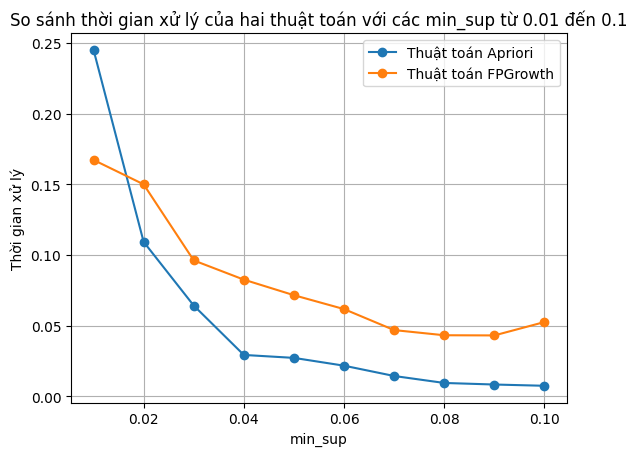

In [36]:
min_sup_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
# Vẽ biểu đồ
plt.plot(min_sup_values, Time_Ap, label='Thuật toán Apriori', marker='o')
plt.plot(min_sup_values, Time_FP, label='Thuật toán FPGrowth', marker='o')
plt.xlabel('min_sup')
plt.ylabel('Thời gian xử lý')
plt.title('So sánh thời gian xử lý của hai thuật toán với các min_sup từ 0.01 đến 0.1')
plt.legend()
plt.grid(True)
plt.show()


Nhận xét: <br>
Qua quan sát, ban đầu, với giá trị min_sup được đặt là 0.01, thì thường thấy rằng thuật toán FP-Growth hoạt động nhanh hơn so với Apriori. Tuy nhiên, khi giá trị min_sup tăng lên, đáng chú ý là thuật toán Apriori lại hiệu quả hơn FP-Growth. Ngược lại, khi min_sup giảm, thì thuật toán FP-Growth thường chạy nhanh hơn.

Giải thích <br>
Khi min_sup nhỏ, nghĩa là chúng ta đang tìm kiếm các luật hiếm xuất hiện trong tập dữ liệu lớn. FP-Growth thường hiệu quả hơn trong trường hợp này vì nó sử dụng một cấu trúc cây dữ liệu được tối ưu hóa để tìm kiếm và phát hiện các mẫu hiếm. Trong khi đó, Apriori phải thực hiện nhiều quét dữ liệu và kiểm tra các tập phổ biến, điều này làm tăng độ phức tạp tính toán.